# Dry Run Tensorflow (Not Quite 'Hello, World')

Ensure the following lines output correctly to ensure the python kernel in use has tensorflow installed.  It's recommended for folks without a working environment on their personal computer to utilize Google Colab https://colab.research.google.com  which allows the use of Jupyter notebooks within the browser (Google's cloud kernel for python).  Login with your Google credentials and choose from the upper-right hand side 'File' >> 'Upload Notebook...'.  The notebook will be saved to your Google drive and can be edited through the IDE within the browser.


In [2]:
import tensorflow as tf
hello = tf.constant('hello,tensorflow')

In [4]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


This should produce just information about the tensor 'hello' that we defined. If the output value of the tensor is required, then a ```session``` all Tensorflow operations must be run in a ```tf.Session()``` (which runs within the C++ graph).  This is part of the way it is able to efficiently utilize GPUs for parallel processing.

In [4]:
with tf.Session() as sess:
    print(sess.run(hello))

b'hello,tensorflow'


If this printed the string that we previously defined ```'hello, tensorflow'```, then we are in business. If you did not see the output in parentheses, then please check the python kernel or Anaconda installation.  

A brief overview of linear algebra and it's connections to tensor arithmetic within tensorflow is given next along with code modules that demonstrate the implementation of such operations.  Please have ```tensorflow``` or ```tensorflow-gpu``` istalled in the python kernel you're using.  If you're using an Anaconda environment, activate the ```conda activate <environment> ``` if it's virtual, then call ```jupyter notebook``` in the terminal.  All arithmetic demos (python code) is done within tensosorflow variables to get the reader acquainted with doing things within a session.

## Brief Review of Linear Algebra $\label{ssec:reviewlinalg}$

A key building block in Machine Learning and Deep Learning is linear algebra.  As a quick review, some basic linear algebraic operations are described below for $u\in \mathbb{C}^{M\times 1}$, $v \in\mathbb{C}^{N\times 1}$, and $A \in \mathbb{C}^{M\times N}$ and $B \in \mathbb{C}^{N\times O}$.  First let's digress, that was some fancy notation, but all it means for our purposes is that $u$ and $v$ are column vectors of length $M$.  The reason for writing $M\times 1$ is to denote that we are working with tensors of maximum dimensionality $2$.  Furthermore $A$ is a matrix with length $M$ rows and $N$ columns.  The $\mathbb{C}$ just means that all elements belong to the set of complex numbers (more general than just saying just $\mathbb{R}$ since $\mathbb{R} \subset \mathbb{C}$ (set of real numbers is a subset of the set of complex numbers).  All operations apply to real numbers, so for $c\in \mathbb{R}$ the conjugate $c^* = c$ and only the transpose operation must be applied.

The inner product \ref{eq:innerproduct} (or dot product) of two vectors $u$ and $v$ (where $M=N$) is a scalar $\alpha\in \mathbb{C}$. The subscript $H$ denotes the Hermitian conjugate  (transpose and complex conjugate denoted by *).  Note that $u$ and $v$ must be the same length.  Recall that the transpose of a vector is the transformation of a column/row vector to a row/column vector 


\begin{equation}\label{eq:innerproduct}
u^Hv = (u^T)^*v = (u^*)^Tv = \alpha 
\end{equation}

\begin{align*}
u = \begin{bmatrix}u_1\\ u_2\\ \vdots \\ u_M\end{bmatrix} & & u^H = \begin{bmatrix} u_1^* & u_2^*& \dots& u_M^*\end{bmatrix}
\end{align*}

In [1]:
import tensorflow as tf #import tensorflow library
M = 10 #set length of vectors
u_real = tf.random.uniform(shape = [M,1],minval = 0, maxval = 10, dtype = tf.float32) #generate random real part
u_imag = tf.random.uniform(shape = [M,1],minval = 0, maxval = 10, dtype = tf.float32) #generate random imaginary part
u = tf.complex(u_real,u_imag) #combine into a complex-valued vector

v_real = tf.random.uniform(shape = [M,1],minval = 0, maxval = 10, dtype = tf.float32)
v_imag = tf.random.uniform(shape = [M,1],minval = 0, maxval = 10, dtype = tf.float32)
v = tf.complex(v_real,v_imag)

alpha = tf.matmul(tf.transpose(tf.conj(u)),v) #matmul (matrix multiplication) interprets these as two column vectors
with tf.Session() as sess: #initialize tensorflow session
    u_o, v_o, alpha_o = sess.run([u,v,alpha]) #run operations
    print('u = ' + str(u_o) + '\n')
    print('v = ' + str(v_o) + '\n')
    print('alpha = ' + str(alpha_o))

u = [[7.722453  +9.282378j ]
 [8.828606  +4.1114306j]
 [4.840288  +7.2938814j]
 [3.4835315 +7.921218j ]
 [0.32647252+1.5788436j]
 [7.4810467 +8.26948j  ]
 [0.9089947 +4.7931824j]
 [6.3937426 +2.121091j ]
 [2.0608914 +6.6455317j]
 [5.6919823 +2.3149025j]]

v = [[3.0895472+8.533325j ]
 [5.8567   +7.4076786j]
 [7.43654  +6.58187j  ]
 [8.602978 +8.50073j  ]
 [2.4093413+0.4243815j]
 [3.5103667+7.5109982j]
 [3.7673569+4.712038j ]
 [0.6004691+8.979704j ]
 [8.511828 +3.152585j ]
 [8.005124 +3.0215967j]]

alpha = [[596.3167+32.084274j]]


The inner product of a vector and itself is equivalent to the $l_2$-norm squared $u^Hu=||u||_2^2$.

The outer product \ref{eq:outerproduct} of two vectors $u$ and $v$ (potentially $M\neq N$, and that's ok) outputs to a matrix $A\in \mathbb{C}^{M\times N}$.  Observe that a matrix is produced at the output, this is also called the tensor product in that particular realm of mathematics.  The magic of it is that it can map to higher dimensional spaces in tensor-space.


\begin{equation}\label{eq:outerproduct}
uv^H = A
\end{equation}



In [2]:
#The outer product 
import tensorflow as tf #import tensorflow library
M = 10
N = 5

u_real = tf.random.uniform(shape = [M,1],minval = 0, maxval = 10, dtype = tf.float32) #generate random real part
u_imag = tf.random.uniform(shape = [M,1],minval = 0, maxval = 10, dtype = tf.float32) #generate random imaginary part
u = tf.complex(u_real,u_imag) #combine into a complex-valued vector

v_real = tf.random.uniform(shape = [N,1],minval = 0, maxval = 10, dtype = tf.float32)
v_imag = tf.random.uniform(shape = [N,1],minval = 0, maxval = 10, dtype = tf.float32)
v = tf.complex(v_real,v_imag)

alpha = tf.matmul(u,tf.transpose(tf.conj(v))) #matmul (matrix multiplication) interprets these as two column vectors
with tf.Session() as sess: #initialize tensorflow session
    u_o, v_o, alpha_o = sess.run([u,v,alpha]) #run operations
    print('u = ' + str(u_o) + '\n')
    print('v = ' + str(v_o) + '\n')
    print('alpha = ' + str(alpha_o))

u = [[1.4175344 +2.3486602j ]
 [3.7481391 +8.855494j  ]
 [3.774724  +0.10832429j]
 [9.74114   +5.4172506j ]
 [2.0374691 +5.512577j  ]
 [6.353408  +8.133069j  ]
 [0.13003588+9.93559j   ]
 [4.5236754 +1.0869288j ]
 [0.9468186 +3.0854392j ]
 [0.83509445+2.8092015j ]]

v = [[2.7281356+0.6795788j]
 [4.627669 +2.211783j ]
 [4.6510816+6.526034j ]
 [3.9499831+7.780737j ]
 [3.767426 +8.156301j ]]

alpha = [[ 5.4633255 +5.444137j  11.754606  +7.733544j  21.920506  +1.6729326j
  23.873545  -1.7522936j 24.496834  -2.7134323j]
 [16.243437 +21.611832j  36.931576 +32.690224j  75.22415  +16.727139j
  83.70735   +5.8157654j 86.3489    +2.7914658j]
 [10.371574  -2.2696989j 17.707762  -7.8475814j 18.263477 -24.130152j
  15.752939 -28.942255j  15.104519 -30.379679j ]
 [30.2566    +8.159122j  57.060555  +3.5239544j 80.66     -38.374935j
  80.62755  -54.395203j  80.88374  -59.04258j  ]
 [ 9.304723 +13.654437j  21.621357 +21.003942j  45.451702 +12.342854j
  50.93988   +5.9215746j 52.63825   +4.150017j ]
 [22

The matrix-vector product \ref{eq:matrixvectorproduct} of $A$ and $v$ is perhaps the most applicable to ML/DL in that it defines the transformation between layers of the multi-layer perceptron (MLP) layers previous to the activation function.  The output is a vector $u$, and please note that this NOT a reversible operation of the outer product unless $u$ and $v$ meet certain conditions (orthonormality $v^Hv = 1$).

\begin{equation}\label{eq:matrixvectorproduct}
Av = u
\end{equation}

In [11]:
#The matrix-vector product
import tensorflow as tf #import tensorflow library
M = 10 
N = 5 


A_real = tf.random.uniform(shape = [M,N],minval = 0, maxval = 10, dtype = tf.float32) #generate random real part
A_imag = tf.random.uniform(shape = [M,N],minval = 0, maxval = 10, dtype = tf.float32) #generate random imaginary part
A = tf.complex(A_real,A_imag) #combine into a complex-valued vector

v_real = tf.random.uniform(shape = [N,1],minval = 0, maxval = 10, dtype = tf.float32)
v_imag = tf.random.uniform(shape = [N,1],minval = 0, maxval = 10, dtype = tf.float32)
v = tf.complex(v_real,v_imag)

u = tf.matmul(A,v) #matmul (matrix multiplication) interprets these as two column vectors
with tf.Session() as sess: #initialize tensorflow session
    A_o, v_o, u_o = sess.run([A,v,u]) #run operations
    print('A = ' + str(A_o) + '\n')
    print('v = ' + str(v_o) + '\n')
    print('u = ' + str(u_o))

A = [[8.142372  +9.510589j   8.440131  +3.650186j   7.5445232 +8.212906j
  3.9699113 +5.343623j   9.988331  +3.4504747j ]
 [3.0326414 +8.998622j   3.893143  +8.159142j   6.1330533 +2.3954666j
  4.8269415 +6.466756j   9.4401    +9.767322j  ]
 [4.16905   +8.80947j    5.112467  +1.382519j   5.148793  +2.709645j
  9.272905  +0.30922413j 0.1789248 +3.601383j  ]
 [1.1851394 +0.8877075j  9.925453  +5.8170853j  9.768124  +1.4073241j
  5.6646633 +0.4477334j  1.099261  +4.08144j   ]
 [0.59557676+4.353899j   8.625451  +6.2170744j  9.963778  +2.2882676j
  9.310974  +9.192639j   4.4949875 +6.3704896j ]
 [9.472601  +6.825559j   3.6200786 +4.1345444j  4.508277  +1.0914028j
  1.297183  +2.9940498j  4.1749516 +4.4151487j ]
 [0.52348495+7.5420914j  2.3730981 +7.4080634j  4.9783716 +3.658613j
  2.6525211 +1.9388068j  9.1264105 +3.05282j   ]
 [7.3440337 +9.1800165j  9.758996  +0.48946738j 8.904049  +2.2649336j
  3.0926836 +2.7547884j  5.0664196 +7.764623j  ]
 [8.006268  +8.827463j   1.4945018 +3.8823628j 

The matrix-matrix product where $A \in \mathbb{C}^{M\times N}$ and $B \in \mathbb{C}^{N\times O}$ is also defined in \ref{eq:matrixmatrixproduct} where the output $C \in \mathbb{C}^{M\times O}$.  One major trend the reader should observe is the emphasis on the shape of the matrices (tensors and vectors too).  The shapes have been explicitly and arguably redundantly stated to coax the reader into using them as an analysis tool.  Often troubleshooting deep learning architectures requires knowledge of the tensors in question, and having knowledge of which dimensions fit where is essentially like using the tensors as bricks that fit together only one way.  In this example, the $N$ dimension is common between $A$ and $B$, so this is the only valid operation for this set of matrices.  

\begin{equation}\label{eq:matrixmatrixproduct}AB = C
\end{equation}

In [12]:
#The matrix-matrix product
import tensorflow as tf #import tensorflow library
M = 10 
N = 5 
O = 3

A_real = tf.random.uniform(shape = [M,N],minval = 0, maxval = 10, dtype = tf.float32) #generate random real part
A_imag = tf.random.uniform(shape = [M,N],minval = 0, maxval = 10, dtype = tf.float32) #generate random imaginary part
A = tf.complex(A_real,A_imag) #combine into a complex-valued vector

B_real = tf.random.uniform(shape = [N,O],minval = 0, maxval = 10, dtype = tf.float32)
B_imag = tf.random.uniform(shape = [N,O],minval = 0, maxval = 10, dtype = tf.float32)
B = tf.complex(B_real,B_imag)

C = tf.matmul(A,B) #matmul (matrix multiplication) interprets these as two column vectors
with tf.Session() as sess: #initialize tensorflow session
    A_o, B_o, C_o = sess.run([A,B,C]) #run operations
    print('A = ' + str(A_o) + '\n')
    print('B = ' + str(B_o) + '\n')
    print('C = ' + str(C_o))

A = [[5.962435  +5.0638447j  2.2047496 +5.620837j   7.462798  +1.8054688j
  8.399988  +8.578398j   1.4547348 +3.9830744j ]
 [4.0647945 +6.330906j   4.33467   +5.439999j   2.0182943 +1.9505191j
  0.3112781 +2.2209203j  1.7629492 +5.5241346j ]
 [2.2885966 +2.7099717j  3.819977  +0.56179285j 1.7270017 +8.35644j
  6.815363  +4.905711j   3.3338153 +3.6041236j ]
 [5.5664134 +6.99811j    6.832715  +9.787225j   6.49246   +1.3596535j
  5.6302905 +9.195929j   0.09796143+1.0132158j ]
 [4.4858274 +2.7995062j  7.629677  +0.19276619j 5.819112  +2.4012601j
  0.42616367+7.1710777j  0.8725178 +8.616665j  ]
 [7.645664  +9.237071j   5.404868  +9.0873575j  0.32995343+2.1813762j
  0.7598281 +5.834117j   7.3987126 +5.0760403j ]
 [1.3333893 +4.127201j   1.8179882 +7.6980915j  8.002882  +0.23452282j
  0.2611816 +8.001409j   0.11083007+4.1966558j ]
 [5.236335  +1.114322j   0.38264513+8.714579j   2.7431    +6.3738084j
  4.449227  +1.2254035j  6.6296997 +3.4734023j ]
 [2.2339356 +1.6061604j  3.7844276 +5.579625j

Another common operation is the Haddamard product \ref{eq:haddamard} which is simply the element wise product between matrices.  Both matrices must have the same shape for this to work $A,B,C \in \mathbb{C}^{M\times N}$.  Note that this works for vectors of the same length too.

\begin{equation}\label{eq:haddamard}
A\odot B = C
\end{equation}

In [15]:
#The Haddamard product
import tensorflow as tf #import tensorflow library
M = 10 
N = 5 

A_real = tf.random.uniform(shape = [M,N],minval = 0, maxval = 10, dtype = tf.float32) #generate random real part
A_imag = tf.random.uniform(shape = [M,N],minval = 0, maxval = 10, dtype = tf.float32) #generate random imaginary part
A = tf.complex(A_real,A_imag) #combine into a complex-valued vector

B_real = tf.random.uniform(shape = [M,N],minval = 0, maxval = 10, dtype = tf.float32)
B_imag = tf.random.uniform(shape = [M,N],minval = 0, maxval = 10, dtype = tf.float32)
B = tf.complex(B_real,B_imag)

C = A*B 
with tf.Session() as sess: #initialize tensorflow session
    A_o, B_o, C_o = sess.run([A,B,C]) #run operations
    print('A = ' + str(A_o) + '\n')
    print('B = ' + str(B_o) + '\n')
    print('C = ' + str(C_o))
    

A = [[1.1865389 +4.5987263j  0.41492105+4.931855j   8.465663  +3.3013475j
  9.124151  +3.1236255j  7.145218  +9.654247j  ]
 [6.9156733 +5.3987074j  4.73562   +6.390016j   5.006281  +2.2519755j
  4.2206597 +0.22459388j 8.518777  +2.6624966j ]
 [0.1384604 +0.6687522j  9.842396  +4.725276j   1.731633  +9.606599j
  4.259905  +9.991009j   6.9442415 +7.9226074j ]
 [4.6812716 +3.2270455j  3.7900198 +4.625348j   6.759808  +8.49701j
  0.06435513+3.6307764j  7.1792674 +4.4907j    ]
 [8.869297  +6.457511j   2.0815766 +6.2989197j  6.204653  +2.8696775j
  0.26066184+8.066862j   1.9892335 +0.76267123j]
 [3.5762036 +6.8442845j  4.179302  +1.8015182j  4.4397736 +2.5804102j
  0.75586677+2.2523093j  9.999324  +6.7210045j ]
 [3.1195378 +3.2408464j  7.224002  +2.697208j   5.093213  +1.9434369j
  2.3799932 +3.5660899j  8.862294  +0.55757403j]
 [4.556489  +7.776904j   1.3988495 +5.379491j   0.3308022 +0.9294069j
  0.41858912+4.1944733j  3.5791767 +5.1598787j ]
 [6.4214444 +1.1430156j  0.4601705 +2.5016701j 

## Transitioning to Tensors


Tensors are defined as any matrix with dimension greater than $2$.  Digital video data is an example of a 3D tensor where the axis are the length, width, and index of each frame (time samples).  This tensor could be denoted as $\mathcal{A}\in\mathbb{R}^{L\times W \times T}$.  More generally it's written $\mathcal{A}\in \mathbb{C}^{M_1\times M_2 \times \dots \times M_D}$ where $D$ denotes the dimension ($D=3$ for the video data case).  Datasets consisting of 2D image data is probably the most common in the world of DL.  A single grayscale image is actually a matrix $A \in \mathbb{R}^{L\times W}$, and in a $\textbf{batch}$ of images could be defined as a tensor $\mathcal{A}\in \mathbb{R}^{B_s \times L \times W \times 1}$  where $B_s$ denotes the batch size.  More than likely color images will be used and the last dimension $1$ for the grayscale case is simply as a placeholder for the case of a batch of color images $\mathcal{B} \in \mathbb{R}^{B_s \times L \times W \times 3}$ where the three indices represent $\textbf{slices}$ of red, green, blue (RGB) values.  A slice is a two dimensional cross-section of a tensor, the $i^{th}$ image (red only) of the batch $\mathcal{B}[i,:,:,0]$.  Note that the while the last dimension has dimension $3$ the indexing starts at $0$.  Furthermore, a $j^{th}$ tensor $\textbf{fiber}$ of $\mathcal{B}$ could be $\mathcal{B}[i,:,j,0]$ which is actually a vector in tensor-space.

The following example comes from the MNIST dataset, this is the "Hello, World" dataset for DL.  It consists of $70000$ grayscale $28\times 28$ images which are split between training and testing data.  The data is imported as a numpy array which is valid for input data into the tensorflow graph.

Shape of B:(64, 28, 28, 1)


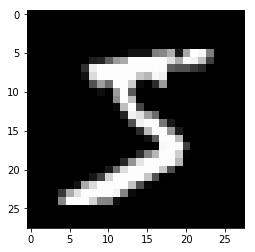

[  0.   0.   0.   0.   0.   3. 170. 253. 253. 253. 253. 253. 190.  35.
   0.   0.   0.   0.   0.  39. 221. 253. 253. 133.   0.   0.   0.   0.]


In [7]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(all_data,_), (_,_) = mnist.load_data() #load dataset
all_data = tf.convert_to_tensor(all_data,tf.float32) #convert to tensor, shape is [60000,28,28]
all_data = tf.expand_dims(all_data,axis = 3) #add placeholder [60000,28,28,1] dimension for data input (more on this later)

Bs = 64 #set batch size
i = 0 #set index
j = 12
with tf.Session() as sess:
    B = sess.run(all_data[0:Bs]) #extract batch through session
    print('Shape of B:{}'.format(B.shape))
    plt.imshow(B[i,:,:,0],cmap = 'gray')  #extract and disply slice.  Could be written more compactly as B[i]
    plt.show()
    print(B[i,:,j,0]) #extract fiber

One may ask why wasn't the variable 'all_data' just indexed to produce an output.  This is because the reader is once again encouraged to get used to the idea of working out a tensorflow graph within a session.  This is vital to running models later on.

## Matrix operations in tensor-space

The operations in $\ref{ssec:reviewlinalg}$ can be implemented with simpler functions in tensor-space.  These are often necessary when inducing linear transformations on particular slices. It's often necessary to carry extra dimensions.  For example a vector could have the shape [1,N,1] where the N values are the vector.  Likewise a matrix doesn't necesarily have to carry it's axis on adjacent dimensions for example the M by N matrix [M,1,N].  All are valid in tensor space.  

It might be necessary to rearrange (transpose) the axis so that the required operation can take place.  <elaborate more on this>

### Inner product

A Haddamard product and the sum of those elements is an inner product (dot product).

In [40]:
#inner product 
lim = 10
M = 5

X = tf.constant(np.random.randint(-lim,lim,[M,1]), tf.float32)
Y = tf.constant(np.random.randint(-lim,lim,[M,1]), tf.float32)
Z = tf.reduce_sum(X*Y)
with tf.Session() as sess:
    Z_o,Y_o,X_o = sess.run([Z,Y,X])
    print('X:{}'.format(X_o))    
    print('Y:{}'.format(Y_o))
    print('Z:{}'.format(Z_o))
    

X:[[ 4.]
 [-8.]
 [-2.]
 [ 5.]
 [ 1.]]
Y:[[-5.]
 [ 5.]
 [-3.]
 [-8.]
 [-5.]]
Z:-99.0


### Matrix-vector product

In [20]:
#Matrix-vector product 
lim = 10
L = 3
N = 5

X = tf.constant(np.random.randint(-lim,lim,[L,1,N]), tf.float32)
Y = tf.constant(np.random.randint(-lim,lim,[1,N,1]), tf.float32)

Zmatmul = tf.matmul(X[:,0,:],Y[0,:,:]) #matmul to check validity    

Z = tf.reduce_sum(Y*X,axis=2) #Y will now have shape [1,1,N]
with tf.Session() as sess:
    Z_o,Z_mmo,Xo,Yo = sess.run([Z,Zmatmul,X,Y])
    print('X: \n' + str(Xo))
    print('Y: \n' + str(Yo))
    print('Tensor Z: \n' + str(Z_o))
    print('Tensor Zmatmul: \n' + str(Z_mmo))

X: 
[[[ -7.  -4.  -6.  -5. -10.]]

 [[  0.   0.   0.  -7.   8.]]

 [[ -6.   2.   1.  -9.  -3.]]]
Y: 
[[[ 7.]
  [-4.]
  [-2.]
  [-7.]
  [-6.]]]
Tensor Z: 
[[-224.  128.   64.  224.  192.]
 [   7.   -4.   -2.   -7.   -6.]
 [-105.   60.   30.  105.   90.]]
Tensor Zmatmul: 
[[74.]
 [ 1.]
 [29.]]


### Matrix-matrix product (not currently working)

# 'Hello, World' with Tensorflow

The reader at this point should understand the need to execute all operations within a session ```tf.Session()```.  There is a whole C++ backend to tensorflow that the python API is built around.  The python code specifies a "Graph" which is constructed, and this ultimately facilitates all model training and testing.  The session initiates the graph to manipulate the model and it's variables.  A basic (not being pretentious) neural network model known as a multi-layer perceptron (MLP) is demonstrated on the MNIST dataset.  After $20$ epochs, or $20$ times cycling through the data, our model should be performing at about $96\%$ accuracy on the evaluation set (or holdout set, or test set).  It is common practice in ML to divide a dataset into sets like these as to prevent overfitting to the data and evaluate the model's ability to generalize.

In [13]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist

tf.reset_default_graph()

def np_one_hot(x,depth,axis=0):
    '''helper function to convert np.array of ints or floats to a matrix of one-hot vectors'''
    N = len(x)
    x = x.astype('int')
    xh = np.zeros((N,depth)).astype('float32')
    xh[np.arange(N),x] = 1.
    return xh

def load_mnist():
    '''load and preprocess MNIST dataset'''
    (x_train,y_train), (x_eval,y_eval) = mnist.load_data() #load dataset
    y_train = np_one_hot(y_train,NUM_CLASSES,axis = 1) #ie. 4 with 10 classes is [0,0,0,0,1,0,0,0,0]
    y_eval = np_one_hot(y_eval,NUM_CLASSES,axis = 1)
    x_train = np.reshape((x_train/255).astype('float32'),[60000,784]) #flatten to [60000,784] and normalize
    x_eval = np.reshape((x_eval/255).astype('float32'),[10000,784]) #flatten to [10000,784] and normalize
    return x_train,y_train,x_eval,y_eval

def dense(x,input_dim,output_dim,name = 'dense'):
    '''Basic dense layer without an activation  z = Wx + b'''
    with tf.variable_scope(name):
        kernel = tf.get_variable('kernel', shape = [input_dim, output_dim],initializer=tf.contrib.layers.xavier_initializer())
        bias = tf.get_variable('bias', shape = [output_dim],initializer=tf.contrib.layers.xavier_initializer())
        x = tf.add(tf.matmul(x,kernel),bias)
        return x
    
def mlp(x,reuse = False, name = 'mlp'):
    '''model to be trained'''
    with tf.variable_scope(name,reuse = reuse) as scope:
        Bs,M = x.get_shape().as_list()
        x = dense(x, input_dim = M, output_dim = NEURONS_PER_LAYER, name = 'dense0')
        x = tf.nn.relu(x)
        x = dense(x, input_dim = NEURONS_PER_LAYER, output_dim = NEURONS_PER_LAYER, name = 'dense1')
        x = tf.nn.relu(x)
        x = dense(x, input_dim = NEURONS_PER_LAYER, output_dim = NUM_CLASSES, name = 'out')
        return x

#Parameter Delcaration
TRAINING_EPOCHS = 20
TRAINING_SIZE = 60000
EVAL_SIZE = 10000
BATCH_SIZE = 100
TRAIN_BATCHES_PER_EPOCH = int(TRAINING_SIZE/BATCH_SIZE)
EVAL_BATCHES_PER_EPOCH = int(EVAL_SIZE/BATCH_SIZE)
NEURONS_PER_LAYER = 512
INPUT_DIM = 784 #(28 x 28)
NUM_CLASSES = 10
LEARNING_RATE = .01

#load dataset
x_train,y_train,x_eval,y_eval = load_mnist()

# Placeholder tf Graph input
X = tf.placeholder("float32", [None,INPUT_DIM])
Y = tf.placeholder("float32", [None,NUM_CLASSES])

#establish model, loss, and optimizer
logits = mlp(X,name = 'mymlp')
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
train_op = optimizer.minimize(loss_op)

#accuracy calculation functions
correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(logits), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float32"))

#Initiate session and begin training/prediction
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(TRAINING_EPOCHS):
        train_cost = 0.
        for batch in range(TRAIN_BATCHES_PER_EPOCH):
            batch_x = x_train[batch*BATCH_SIZE : (batch + 1)*BATCH_SIZE]
            batch_y = y_train[batch*BATCH_SIZE : (batch + 1)*BATCH_SIZE]
            _,c = sess.run([train_op,loss_op], feed_dict = {X: batch_x, Y: batch_y})
            train_cost += c/TRAIN_BATCHES_PER_EPOCH
        print("Accuracy for epoch " + str(epoch + 1) + ":", accuracy.eval({X: x_eval, Y: y_eval}))
            
    

Accuracy for epoch 1: 0.8813
Accuracy for epoch 2: 0.9069
Accuracy for epoch 3: 0.916
Accuracy for epoch 4: 0.9246
Accuracy for epoch 5: 0.9293
Accuracy for epoch 6: 0.9346
Accuracy for epoch 7: 0.9381
Accuracy for epoch 8: 0.9396
Accuracy for epoch 9: 0.9418
Accuracy for epoch 10: 0.9448
Accuracy for epoch 11: 0.9475
Accuracy for epoch 12: 0.949
Accuracy for epoch 13: 0.951
Accuracy for epoch 14: 0.9522
Accuracy for epoch 15: 0.9544
Accuracy for epoch 16: 0.9554
Accuracy for epoch 17: 0.9571
Accuracy for epoch 18: 0.9585
Accuracy for epoch 19: 0.9601
Accuracy for epoch 20: 0.9609


## Walkthrough of 'Hello, World' Program

 That was a lot, with not a lot of comments, so let's take a step back and go through (almost) line-by-line and explain what just happened.  ```tf.reset_default_graph()``` is nice for clearing all graph variables.  Since a namespace is used, multiple runs of the script may confuse the RAM holding all the variable names, and will cause an error saying that those variables already exist.  This is particularly necessary when saving/loading weights from a previously trained execution.
 
 The first function ```np_one_hot``` is not core to anything, but a custom function to turn an array of integers or floats (integer values) into "one-hot" vectors.  Meaning that the $i^{th}$ index of a vector is $1$ and the rest are $0$.  The labels are interpreted this way in the cross entropy cost function (more later).
 
 In ```load_mnist``` the data is loaded from ```keras```' own library and preprocessed.  First the labels are converted to one-hot vectors and the data images themselves is flattend from a $28\times 28$ matrix into a $784$ element vector.  All individual inputs to an MLP are vectors (the batch makes them a matrix), so it's traditional to flatten them like this. The data are also normalized (all pixel values $[0,1]$) from their 8-bit pixel values $[0,255]$.  Data normalization is a widely discussed topic in ML/DL, and publications have shown that it enables a model to converge faster CITATION.  It also tends to help your weights from blowing up.  There is also batch normalization which is a layer that can be added to tensorflow architectures.  

The ```dense``` function describes the generic densely connected layer within a neural network. This document now takes a slight tangent to provide a formal overview of deriving the updates for the back-propagation algorithm \cite{rumelhart1986learning} implemented for MLPs networks.  Throughout this each trainable layer will be referred to with the index $l$ denoting the $l^{th}$ layer of $L$ total layers and the $k^{th}$ neuron of $K_l$.  Each neuron is composed of a weight $w_l^k \in \mathbb{R}^{K_l-1 \times 1}$ whose transpositions $(w_l^k)^T$ are the rows in matrix $W_l \in \mathbb{R}^{K_l\times K_l-1}$ and bias term $b \in \mathbb{R}^{K_l\times 1}$.   Eq. \ref{eq:z} shows the pre-activation output $z_l \in \mathbb{R}^{K_l \times 1}$ with input tensor $\hat{y}_{l-1} \in \mathbb{R}^{K_l-1\times 1}$ and output tensor $\hat{y}_{l} \in \mathbb{R}^{K_l\times 1}$.  Note that the input tensor at $l = 1$ is the data input $x\in\mathbb{R}^{N\times 1}$, where $N$ denotes the original input dimension.  Eq. \ref{eq:yzact} shows the activation function $f(z_l): \mathbb{R}^{K_l\times 1}\to \mathbb{R}^{K_l\times 1}$ as an operation on $z_l$.

\begin{equation}\label{eq:z}
z_l = W_l\hat{y}_{l-1} + b  = \begin{bmatrix}W_l & b\end{bmatrix} \begin{bmatrix}\hat{y}_{l-1} \\ 1\end{bmatrix}
\end{equation}

\begin{equation}\label{eq:yzact}
\hat{y}_l = f(z_l)
\end{equation}

Each hidden layer utilizes a rectified linear unit (ReLU) Eq. \ref{eq:relu}as it's activation function and an output layer softmax function \ref{eq:softmax} for  $z_l$\footnote{In a few cases it is necessary to refer to individual $k^{th}$ elements of a vector which are more often than not associated with the $k^{th}$ neuron, this will be denoted by $z_{l}[k]$ where $z_l \in \mathbb{R}^{K_l\times 1}$.  The notation from \cite{oppenheim2009dtsp} is used.}.  The reader may have observed that there is no softmax in the ```mlp``` function, this will be addressed when the cost function is discussed.  The $ReLU(\cdot)$ presents an interesting case in that it cannot be directly differentiated.  However, piecewise it can be interpreted as Eq. \ref{eq:drelu}, and the softmax derivative in \ref{eq:dsoftmax}. These are commonly used activation functions \cite{krizhevsky2012imagenet} \cite{nair2010rectified}.

\begin{multicols}{2}
\begin{equation}\label{eq:relu}
ReLU(z_l) = max(0,z_l)
\end{equation}

\begin{equation}\label{eq:softmax}
\rho(z_l)= \frac{e^{z_l}}{\sum_{k = 1}^{K_l}e^{z_{l}[k]}}
\end{equation}
\end{multicols}

\begin{multicols}{2}
\begin{equation}\label{eq:drelu}
\frac{\partial ReLU(z_l)}{\partial z_l} =  \mathbbm{1}(z_l >0)
\end{equation}

\begin{equation}\label{eq:dsoftmax}
\frac{\partial\rho(z_{l}[k])}{\partial z_{l}[j]}= \rho(z_{l}[k])(\mathbbm{1}(j = k) - \rho(z_{l}[j]))
\end{equation}

\end{multicols}

These partial derivatives are necessary for deriving the update equations for each back-propagation iteration.  A cost/loss function of cross-entropy in Eq. \ref{eq:crossentropy} will be used.  The apparent "missing softmax" is because both the cost function and output layer activation are all combined in the loss function that also facilitates the graidents: ```tf.nn.softmax_cross_entropy_with_logits_v2```.  $y\in \mathbb{R}^{K_L \times 1}$ (and $\therefore \sum_{k=1}^{K_L}y_k = 1$) is the label for the one sample of data interpreted as a one-hot vector (all zeros except respective class index).  As a quick derivation denote relative entropy, or the Kullback-Leibler Divergence, and conclude that the given labels have no entropy $\mathbbm{H}(y)=0$ based on both the facts that the labels are known and that numerically the metric is exactly $0$.  Next a formal derivation of the update equations is given, the reader can skip to the indicated section if they are primarily interested in the code itself.

$\textbf{SKIP IF NOT INTERESTED IN THE MATHEMATICAL DERIVATION}$

\begin{align*}
\mathbbm{D}(y|\hat{y}) &= -\sum_{k = 1}^{K_L}y[k]log\left(\frac{\hat{y}_{L}[k]}{y[k]}\right)\\ \
&= -\sum_{k = 1}^{K_L}y[k]log(\hat{y}_{L}[k]))+\sum_{k = 1}^{K_L}y[k]log(y[k]) \\
&=  -\sum_{k = 1}^{K_L}y[k]log(\hat{y}_{L}[k])) - \mathbbm{H}(y) \\
&= -\sum_{k = 1}^{K_L}y[k]log(\hat{y}_{L}[k]))
\end{align*}

\begin{equation}\label{eq:crossentropy}
E = -\sum_{k = 1}^{K_L}y[k]log(\hat{y}_{L}[k])
\end{equation}

This network has a final activation layer of softmax and finite hidden layers with $ReLU(\cdot)$ activation.   In this case there are three steps in order to competely generalize all update equations;  this becomes an increasingly difficult problem as activations change layer-per-layer.  The first step is to derive the update equation for the output layer.  Rewrite $E$ as

\begin{equation}\label{eq:costfuncz}
E = -\sum_{k = 1}^{K_L}y[k]log(\hat{y}_{L}[k]) = -\sum_{k=1}^{K_L} y[k](z_{L}[k]-log\begin{pmatrix}\sum_{i=1}^{K_L}e^{z_{L}[i]}\end{pmatrix} 
\end{equation}

Then differentiate with respect to the weight $w_{k}^L$ using the chain rule.  The $j$ index represents the $j^{th}$ row of the update matrix.  Utilizing Eq. \ref{eq:dsoftmax}:

$$\frac{\partial E}{\partial w_{k}^L} = \frac{\partial E}{\partial \hat{y}_{L}[k]}\frac{\partial \hat{y}_{L}[k]}{\partial z_{L}[k]}\frac{\partial z_{L}[k]}{\partial w_{k}^L}$$

\begin{align*}
\frac{\partial E}{\partial \hat{y}_{L}[k]}\frac{\partial \hat{y}_{L}[k]}{\partial z_{L}[k]}& = -\sum_{k=1}^{K_L}y[k]\begin{pmatrix}\mathbbm{1}(j = k) - \frac{exp(z_{L}[m])}{\sum_{i=1}^{K_L}exp(z_{L}[i])}\end{pmatrix}\\
&=  -\sum_{k=1}^{K_L}y[k]\begin{pmatrix}\mathbbm{1}(j = k) - \hat{y}_{L}[k]\end{pmatrix}\\
&= -\sum_{k=1}^{K_L}y[k]\mathbbm{1}(j = k) + \sum_{k=1}^{K_L}y[k]\hat{y}_{L}[k]\\
& = -y[k] + \hat{y}_{L}[k]
\end{align*}

\begin{equation}\label{eq:gradEz}
\hat{y}_{L}[j] - y[j]
\end{equation}

Trivially, using matrix differentiation rules

 $$\frac{\partial z_{L}[k]}{\partial w_{k}^L} = \hat{y}_{L-1}^T$$

Hence, the $j^{th}$ row of the update matrix for the output layer $\Delta W_L \in \mathbb{R}^{K_L \times K_{L-1}+1}$ can be described by 

$$(\hat{y}_{L}[j] - y[j])\hat{y}_{L-1}^T$$

A "$1$" is appended to the end of the input tensor to update the bias $b$ and by taking an outer product, in matrix notation form:

\begin{equation}\label{eq:outputupdate}
\Delta W_L = (\hat{y}_{L} - y)\begin{bmatrix}\hat{y}_{L-1}^T&1\end{bmatrix}
\end{equation}

The attention now shifts to the $L-1$ layer, that is, the last hidden layer before the output layer with activation function $ReLU(z_{L-1})$.  The work to obtain Eq. \ref{eq:gradEz} can be leveraged to start.  The required chain rule expression is as follows:

$$\frac{\partial E}{\partial w_k^{L-1}} = \frac{\partial E}{\partial \hat{y}_{L}[k]}      \frac{\partial \hat{y}_{L}[k]}{\partial z_{L}[k]}    \frac{\partial z_{L}[k]}{\partial \hat{y}_{L-1}}    \frac{\partial \hat{y}_{L-1}}{\partial z_{L-1}[k]}  \frac{\partial z_{L-1}[k]}{\partial w_k^{L-1}}   $$


The first two partial derivatives were done for the first part.  From Eq. \ref{eq:drelu}:

$$\frac{\partial \hat{y}_{L-1}}{\partial z_{L-1}[k]} = \mathbbm{1}(z_{L-1}[k] >0) $$

and trivially,

\begin{align*}
& \frac{\partial z_{L}[k]}{\partial \hat{y}_{L-1}}=(w_{L}^k)^T &\frac{\partial z_{L-1}[k]}{\partial w_k^{L-1}} = \hat{y}_{L-2}
\end{align*}

The following expression is obtained in Eq. \ref{eq:quasirow}, but cannot be directly inserted as a row in the update matrix $\Delta W_{L-1} \in \mathbb{R}^{K_{L-1}+1 \times K_{L-2}}$.    

\begin{equation}\label{eq:quasirow}
\frac{\partial E}{\partial w_k^{L-1}} =\hat{y}_{L-2}(\hat{y}_{L}[k] - y[k])(w_{k}^L)^T \mathbbm{1}(z_{L-1}[k] >0)
\end{equation}

Define a diagonal matrix $P_{l-1} \in \mathbb{R}^{K_{l-1} \times K_{l-1} }$ whose elements $P[k,k] =1$ if $z_{l-1}[k] >0$, and zeros otherwise. Then

\begin{equation}\label{eq:updatehidden}
\Delta W^T_{L-1} = \begin{bmatrix}\hat{y}_{L-2}\\1\end{bmatrix}(\hat{y}_L^T - y^T)W_LP_{L-1}
\end{equation}

\begin{equation}\label{eq:generalupdate}
\Delta W^T_{l} = \begin{bmatrix}\hat{y}_{l-1}\\1\end{bmatrix}(\hat{y}_L^T - y^T)W_LP_{L-1}W_{L-1}P_{L-2} \dots W_{l+1}P_{l}
\end{equation}

The updates for stochastic gradient descent will look as follows in Eq. \ref{eq:sgdu} for the $l^{th}$ layer.  $\eta$ is the learning rate.  Batch updates are defined in Eq. \ref{eq:batchu} where $B_s$ is the batch size.  Parallel computing would evaluate all gradients and weight updates simultaneously for $M$ forward passes.  Denote the tensor $\Delta\mathcal{W}_l \in \mathbb{R}^{B_s \times K_{l+1} \times K_{l + 1}}$ where the $m^{th}$ element is a 2D matrix of weights.


\begin{equation}\label{eq:sgdu}
\begin{bmatrix}W_l & b\end{bmatrix} = \begin{bmatrix}W_l & b\end{bmatrix} - \eta \Delta W_l
\end{equation}

\begin{equation}\label{eq:batchu}
\begin{bmatrix}W_l & b\end{bmatrix} = \begin{bmatrix}W_l & b\end{bmatrix} - \frac{\eta}{B_s}\sum_{m=1}^M \Delta \mathcal{W}_l[:,:,m]
\end{equation}

$\textbf{MATH DERIVATION ENDS HERE...}$

All the derivations above fit nicely within the script as ```tf.train.GradientDescentOptimizer``` (aren't high-level APIs great?) since the output activation and cost function (softmax and cross-entropy) have already been designated.  Hence, when ```train_op``` is run in the session it calculates all these gradients and uses them to take step shown above.  These steps will take the "steepest" step towards what is hopefully a global minimum.  This minimization is what allows the model to fit to the data.

The ```accuracy``` function is helper function that's used to calculate the evaluation accuracy to check in at each epoch of how well the model is doing.  Last but not least is the ```tf.Session()``` block which first initializes all variables ```tf.global_variables_initializer().run()```.  The outer loop goes through the entire training set (one ```epoch```) once each iteration and prints the accuracy on the evaluation set.  The inner loop is where the ```train_op``` is run in the session and updates the weights as described above.  Each inner loop iteration a batch is pulled from the full train dataset and set as the feed dictionary ```feed_dict```.  This is how the training routine knows what data to consume.

Lines 39 and 27 have use ```with``` to place the declared layers/kernels under a "variable scope".  This allows us to automatically declare new trainable variables when a new layer is added.  It also allows us to store these in the graph so that the trained weights can be reused (```reuse```) for evaluation purposes.  A lot more detail on variable scopes can be found in ```tensorflow``` documentation.